In [25]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [26]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [27]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [28]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    if game_num == 0:
        continue
        
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    
    if old_score == 0:
        continue
        
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and one_date < '2018-09-16_17-00-24' and elo < 0:
        elo = 0
    #elif one_date >= '2018-09-16_17-00-24' and elo < -100:
    #    elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

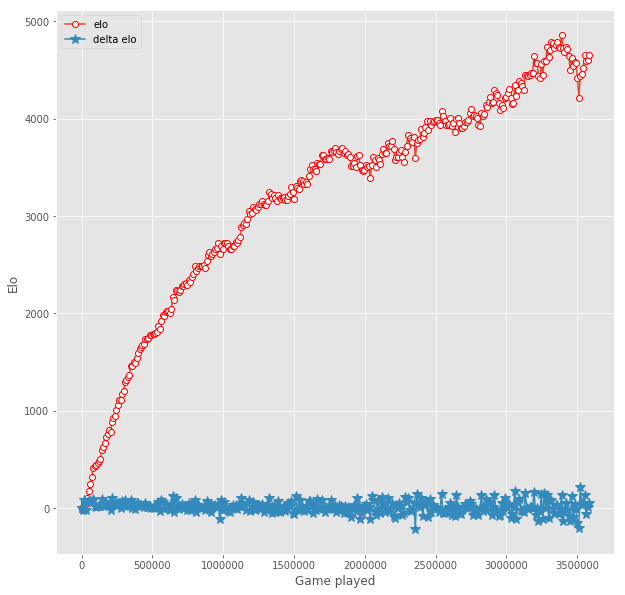

In [29]:
plt.figure(figsize=(10,10))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [30]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i is None else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
340,2018-11-08_10-10-19_noup,-12.755658,4568.115622,3490578,10019,0.155963,218,0.481651,上位
341,2018-11-08_16-20-17_noup,-150.619466,4417.496155,3500757,10179,0.233945,218,0.295872,上位
342,2018-11-08_22-10-13_noup,-201.641898,4215.854258,3510772,10015,0.064220,218,0.238532,上位
343,2018-11-09_02-30-13_noup,218.658187,4434.512445,3520962,10190,0.156682,217,0.778802,上位
344,2018-11-09_07-10-18_noup,27.529118,4462.041562,3531290,10328,0.186047,215,0.539535,上位
345,2018-11-09_11-10-14_noup,56.267773,4518.309335,3541677,10387,0.151376,218,0.580275,上位
346,2018-11-09_14-40-15_noup,132.565050,4650.874385,3551912,10235,0.138249,217,0.682028,上位
347,2018-11-09_18-00-13_noup,-59.824485,4591.049900,3561931,10019,0.175115,217,0.414747,上位
348,2018-11-09_21-30-16_noup,15.948605,4606.998505,3572316,10385,0.174312,218,0.522936,上位
349,2018-11-10_01-20-15_noup,48.117533,4655.116038,3582359,10043,0.183486,218,0.568807,上位


In [31]:
!ls -l ../data/distributed/ | wc -l 

4036


In [32]:
!ls -l ../data/distributed/ | grep peace | wc -l

290


In [33]:
!ls -l ../data/distributed/ | grep '_w'| wc -l 

1960


In [34]:
!ls -l ../data/distributed/ | grep '_b'| wc -l 

1785


In [35]:
! date

2018年 11月 12日 星期一 22:03:36 CST


In [36]:
!nvidia-smi

Mon Nov 12 22:03:37 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 38%   65C    P2    75W / 250W |   4421MiB / 11172MiB |     35%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:42:00.0 Off |                  N/A |
| 28%   49C    P8    17W / 250W |  11163MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        